In [1]:
import pandas as pd
import numpy as np
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

dataX = pd.read_fwf('uWaveGestureLibrary_X_TRAIN_tx.txt',header=None)
dataY = pd.read_fwf('uWaveGestureLibrary_Y_TRAIN_tx.txt',header=None)
dataZ = pd.read_fwf('uWaveGestureLibrary_Z_TRAIN_tx.txt',header=None)
classes=dataX.iloc[:,0]

I converted the files to text file and I saved them by putting "_tx" at the end of their names.Then, acceleration data are read and I got class information from the data.

In [2]:
sumx=np.cumsum(dataX.iloc[:,1:],axis=1)
sumy=np.cumsum(dataY.iloc[:,1:],axis=1)
sumz=np.cumsum(dataZ.iloc[:,1:],axis=1)

sumx=np.cumsum(sumx.iloc[:,1:],axis=1)
sumy=np.cumsum(sumy.iloc[:,1:],axis=1)
sumz=np.cumsum(sumz.iloc[:,1:],axis=1)

I transformed this information to a location vector by computing the cumulative sum of acceleration over time 2 times.

In [3]:
dataX= pd.concat([classes, sumx], axis=1, sort=False)
dataY= pd.concat([classes, sumy], axis=1, sort=False)
dataZ= pd.concat([classes, sumz], axis=1, sort=False)

I concatenated the the cumulative sum data and class informations.

In [4]:
dataX.insert(loc=0, column='Index', value=range(0,896))
dataY.insert(loc=0, column='Index', value=range(0,896))
dataZ.insert(loc=0, column='Index', value=range(0,896))

Then, I assigned index values for each observation in the data.

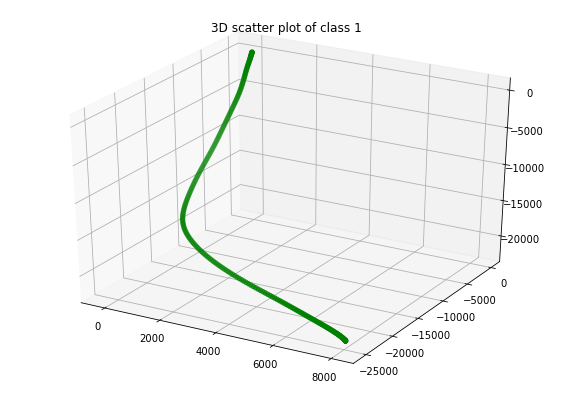

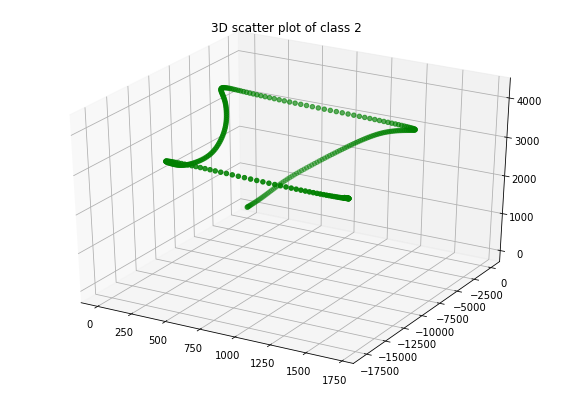

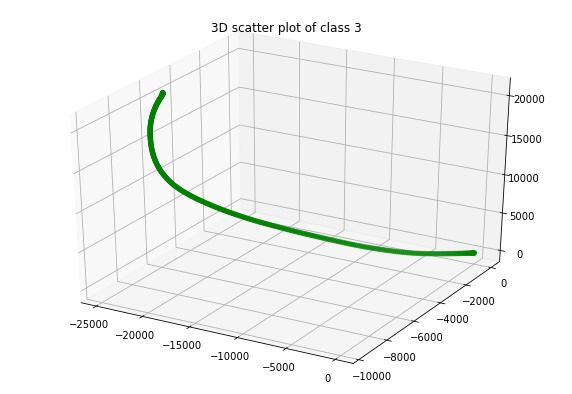

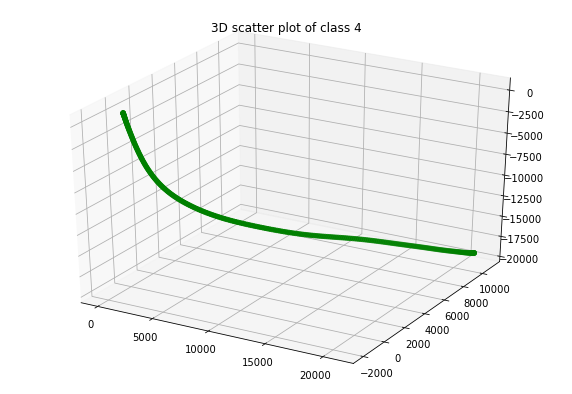

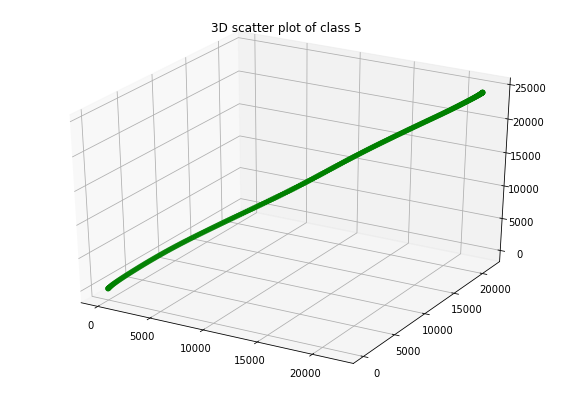

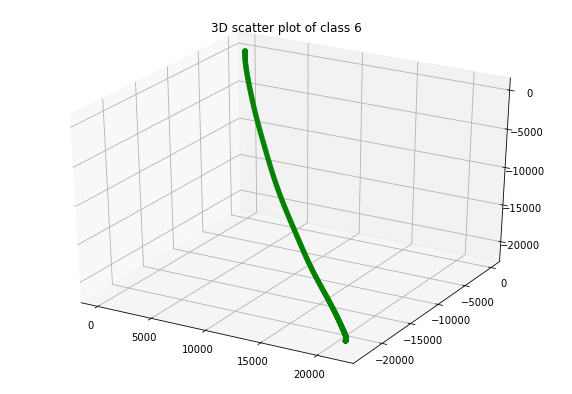

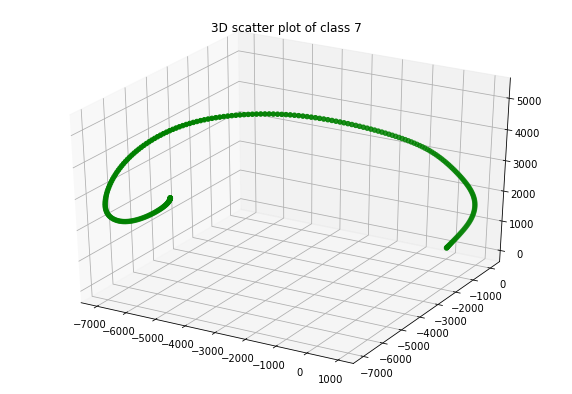

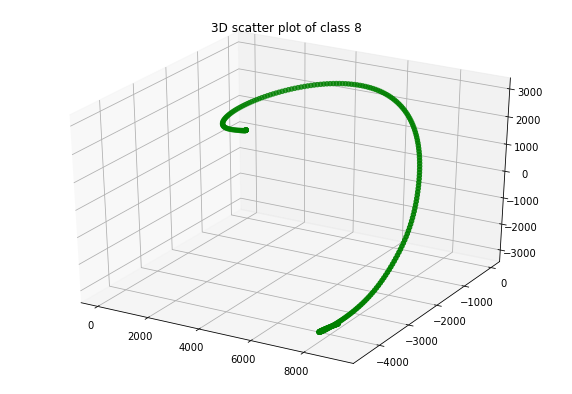

In [5]:
for i in range(1,9):
    Same_class_observations=dataX.loc[dataX.iloc[:,1]==i]
    sample=Same_class_observations.sample()

    x=dataX.loc[sample.iloc[0,0]][2:]
    y=dataY.loc[sample.iloc[0,0]][2:]
    z=dataZ.loc[sample.iloc[0,0]][2:]

    # Creating figure
    fig = plt.figure(figsize = (10, 7))
    ax = plt.axes(projection ="3d")
 
    # Creating plot
    ax.scatter3D(x, y, z, color = "green")
    #plt.scatter(x,z)
    plt.title('3D scatter plot of class %s' %i )
 
    # show plot
    plt.show()

In this for loop, I filtered the data for each class and I picked a random observation from this filtered data. Then, I plotted 3D scatter plot for the randomly selected observation. The same procedure is applied for each classes. From these plots, I can easily say that the patterns on the plots agree with the actual gestures provided in the homework file. Therefore, we can conclude that the acceleration data may be meaningful and can be used.